# Importar las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
crs = {'init', 'epsg:4326'}
%matplotlib inline

# Importar los datos

In [2]:
data = pd.read_csv("../datasets/datlas.csv")
data.head()

/Users/Pablo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,13,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,...,AÑO,MES,DÍA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE,Unnamed: 20,Unnamed: 21
0,D00001,22.768507,-102.567896,98000,*EP 2 Boulevard Adolfo López Mateos,CERRADA DE CASA BLANCA,COLISION Y/O VUELCO,Camión,BLANCO,2016,...,2018,1,11,JUEVES,15,NUEVO LEÓN,SAN NICOLAS DE LOS GARZA,11/01/2018,NaN,NaN
1,D00002,25.647351,-100.140132,67277,AMERICA 65,BALCONES DE ZINDARO,COLISION Y/O VUELCO,Camión,BLANCO,2009,...,2018,1,25,JUEVES,10,NUEVO LEÓN,JUAREZ,25/01/2018,NaN,NaN
2,D00003,20.679917,-103.368657,44600,AV MEXICO,2 RIOS,COLISION Y/O VUELCO,Auto,BLANCO,2005,...,2018,1,15,LUNES,9,NUEVO LEÓN,GUADALUPE,15/01/2018,NaN,NaN
3,D00004,25.718027,-100.249990,66480,Avenida Conductores,Conductores Infonavit,COLISION Y/O VUELCO,Auto,GRIS,2016,...,2018,1,19,VIERNES,9,NUEVO LEÓN,SAN NICOLAS DE LOS GARZA,19/01/2018,NaN,NaN
4,D00005,19.266303,-99.331791,\N,UBERP3,Cuajimalpa,HUELGAS Y ALBOROTOS,Auto,NEGRO,2016,...,2018,1,3,MIERCOLES,16,NUEVO LEÓN,MONTERREY,03/01/2018,NaN,NaN


# Análisis de los datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116011 entries, 0 to 116010
Data columns (total 22 columns):
 FOLIO_ID              116011 non-null object
LAT                    113854 non-null float64
LONG                   113854 non-null float64
CODIGO POSTAL          115926 non-null object
CALLE                  116011 non-null object
COLONIA                115921 non-null object
CAUSA SINIESTRO        116011 non-null object
TIPO VEHICULO          115917 non-null object
COLOR                  115852 non-null object
MODELO_VEHICULO        115925 non-null object
NIVEL DAÑO VEHICULO    115088 non-null object
PUNTO DE IMPACTO       104935 non-null object
AÑO                    116008 non-null object
MES                    116011 non-null object
DÍA NUMERO             116011 non-null int64
DIA                    116011 non-null object
HORA                   116011 non-null object
ESTADO                 116011 non-null object
CIUDAD_APROXIMADA      116011 non-null object
DATE          

**Eliminar las columnas `Unnamed: 20` y `Unnamed: 21`**

In [4]:
cols = data.columns.values
new_cols = cols[:-2]
data = data[new_cols]
print("COLUMNAS RESTANTES")
for i, col in enumerate(data.columns.values):
    print(f"{i+1}. {col}")

COLUMNAS RESTANTES
1.  FOLIO_ID
2. LAT
3. LONG
4. CODIGO POSTAL
5. CALLE
6. COLONIA
7. CAUSA SINIESTRO
8. TIPO VEHICULO
9. COLOR
10. MODELO_VEHICULO
11. NIVEL DAÑO VEHICULO
12. PUNTO DE IMPACTO
13. AÑO
14. MES
15. DÍA NUMERO
16. DIA
17. HORA
18. ESTADO
19. CIUDAD_APROXIMADA
20. DATE 


In [5]:
print("TAMAÑO DE LOS DATOS")
print(f"Columnas: {data.shape[1]}")
print(f"Filas:    {data.shape[0]}")
starting_row_count = data.shape[0]

TAMAÑO DE LOS DATOS
Columnas: 20
Filas:    116011


**Limpiar las columnas de datos vacios**

In [6]:
data = data.dropna(axis=0, how='any')
print(f"NUEVO NÚMERO DE FILAS: {data.shape[0]}")
print(f"Filas eliminadas:      {starting_row_count - data.shape[0]}")

NUEVO NÚMERO DE FILAS: 102977
Filas eliminadas:      13034


**Limpiar algunas columnas con valores recorridos**

In [7]:
print("Tamaño del dataset antes de eliminar las filas: ", data.shape[0])
data.drop(axis=0, index=[29112,50965,100280,108462], inplace=True)
print("Tamaño del dataset después de eliminar las filas: ", data.shape[0])

Tamaño del dataset antes de eliminar las filas:  102977
Tamaño del dataset después de eliminar las filas:  102973


## Horas en las que ocurren más choques

In [8]:
horas = [int(x) for x in list(data['HORA'])]

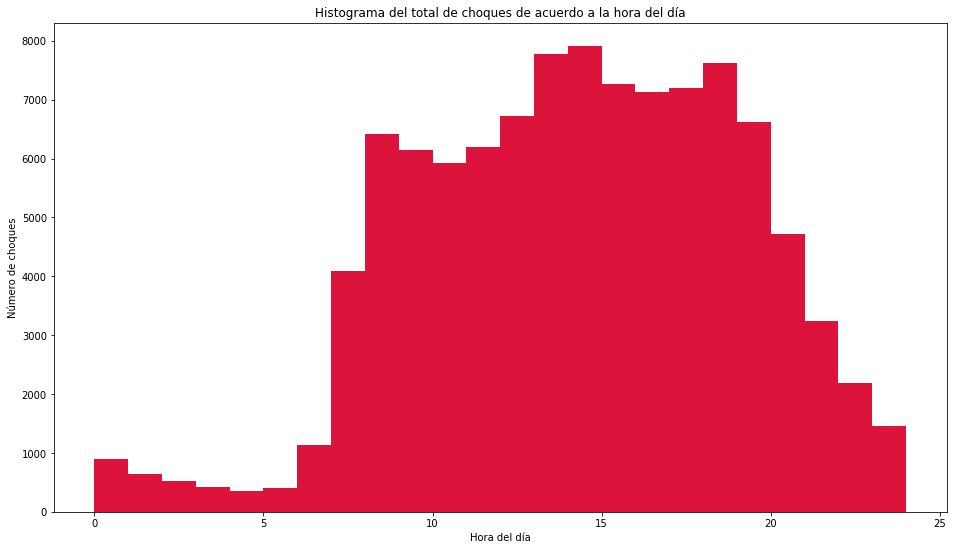

In [9]:
top_horas = plt.figure(figsize=(16,9))

bins = [x for x in range(25)]
plt.hist(horas, bins=bins, color="crimson")

plt.title("Histograma del total de choques de acuerdo a la hora del día", )
plt.xlabel("Hora del día")
plt.ylabel("Número de choques")

plt.show()

## Mapa de donde ocurren la mayor cantidad de choques

In [10]:
import descartes as ds
import geopandas as gpd
from shapely.geometry import Point, Polygon

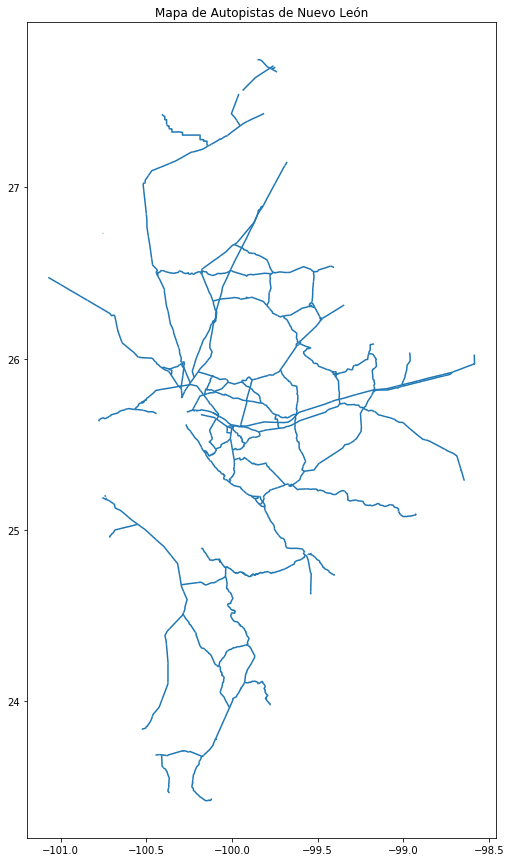

In [71]:
street_map = gpd.read_file("../datasets/NL/camf-nlg.shp")
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax = ax)
plt.title("Mapa de Autopistas de Nuevo León")
plt.show()

In [18]:
print("NIVELES DE DAÑO")
for nivel in list(data["NIVEL DAÑO VEHICULO"].unique())[:-1]:
    print(f"- {nivel}")

NIVELES DE DAÑO
- Sin daño
- Bajo
- Medio
- Alto


**Limpia de las partes del mapa que queremos**

In [56]:
data_map_01 = data[data["LONG"] < -95]
data_map_02 = data_map_01[data_map_01["LONG"] > -102]
data_for_map = data_map_02[data_map_02["LAT"] > 22.5]

In [57]:
gdf = gpd.GeoDataFrame(
    data_for_map, geometry=gpd.points_from_xy(data_for_map.LONG, data_for_map.LAT))

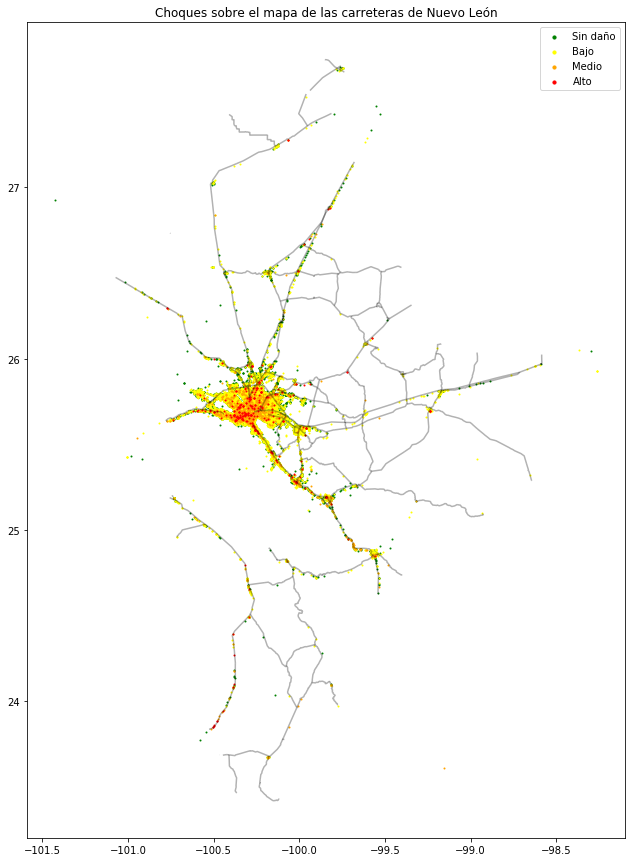

In [99]:
fig, ax = plt.subplots(figsize=(15,15))

street_map.plot(ax=ax, alpha=0.3, color="black")

gdf[gdf["NIVEL DAÑO VEHICULO"] == "Sin daño"].plot(ax=ax, color="green", markersize=1, label="Sin daño")
gdf[gdf["NIVEL DAÑO VEHICULO"] == "Bajo"].plot(ax=ax, color="yellow", markersize=1, label="Bajo")
gdf[gdf["NIVEL DAÑO VEHICULO"] == "Medio"].plot(ax=ax, color="orange", markersize=1, label="Medio")
gdf[gdf["NIVEL DAÑO VEHICULO"] == "Alto"].plot(ax=ax, color="red", markersize=1, label="Alto")

plt.title("Choques sobre el mapa de las carreteras de Nuevo León")
lgnd = plt.legend(loc="best", fontsize=10)
lgnd.legendHandles[0]._sizes = [10]
lgnd.legendHandles[1]._sizes = [10]
lgnd.legendHandles[2]._sizes = [10]
lgnd.legendHandles[3]._sizes = [10]

plt.show()

In [80]:
print("Número de choques de acuerdo al daño:")
print(f"Sin daño:   {gdf[gdf['NIVEL DAÑO VEHICULO']=='Sin daño'].shape[0]}")
print(f"Bajo:       {gdf[gdf['NIVEL DAÑO VEHICULO']=='Bajo'].shape[0]}")
print(f"Medio:      {gdf[gdf['NIVEL DAÑO VEHICULO']=='Medio'].shape[0]}")
print(f"Alto:       {gdf[gdf['NIVEL DAÑO VEHICULO']=='Alto'].shape[0]}")

Número de choques de acuerdo al daño:
Sin daño:   41046
Bajo:       51720
Medio:      1368
Alto:       288


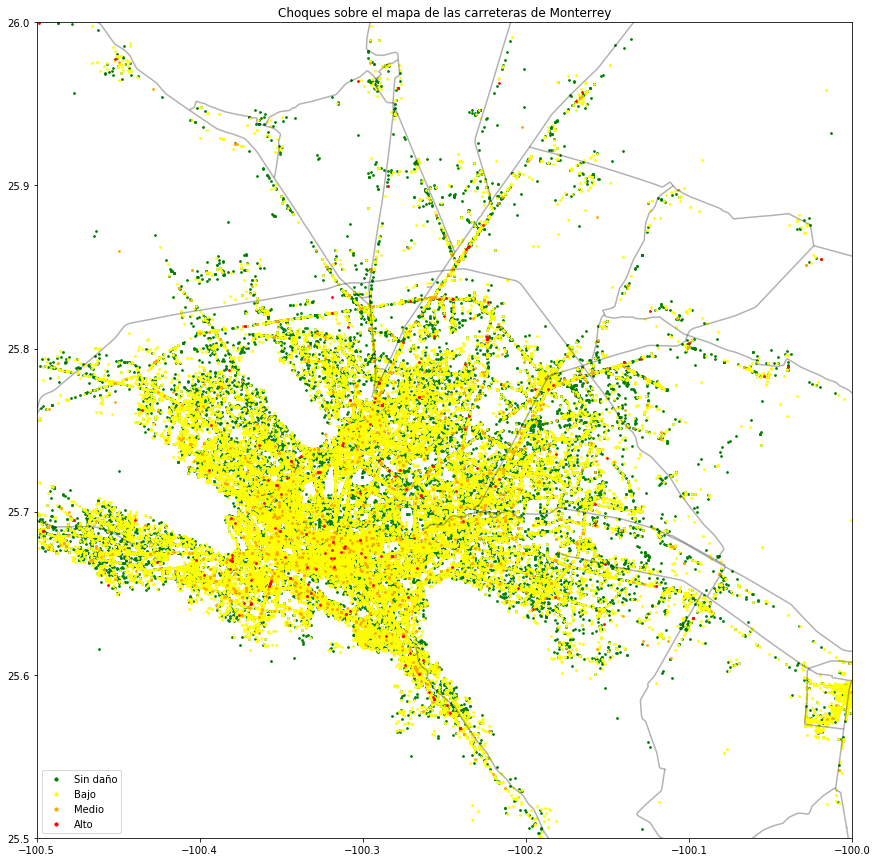

In [109]:
fig, ax = plt.subplots(figsize=(15,15))

street_map.plot(ax=ax, alpha=0.3, color="black")

gdf[gdf["NIVEL DAÑO VEHICULO"] == "Sin daño"].plot(ax=ax, color="green", markersize=3, label="Sin daño")
gdf[gdf["NIVEL DAÑO VEHICULO"] == "Bajo"].plot(ax=ax, color="yellow", markersize=3, label="Bajo")
gdf[gdf["NIVEL DAÑO VEHICULO"] == "Medio"].plot(ax=ax, color="orange", markersize=3, label="Medio")
gdf[gdf["NIVEL DAÑO VEHICULO"] == "Alto"].plot(ax=ax, color="red", markersize=3, label="Alto")

plt.title("Choques sobre el mapa de las carreteras de Monterrey")
lgnd = plt.legend(loc="best", fontsize=10)
lgnd.legendHandles[0]._sizes = [10]
lgnd.legendHandles[1]._sizes = [10]
lgnd.legendHandles[2]._sizes = [10]
lgnd.legendHandles[3]._sizes = [10]

plt.xlim([-100.5, -100])
plt.ylim([25.5, 26])

plt.show()

## Choques en Nuevo León de acuerdo a su causa

In [125]:
print("CAUSAS DE CHOQUES")
causas = data["CAUSA SINIESTRO"].value_counts()
causas

CAUSAS DE CHOQUES


COLISION Y/O VUELCO           101160
FENOMENOS DE LA NATURALEZA      1220
ATROPELLO                        387
INCENDIO RAYO O EXPLOSION         87
DAÑOS POR LA CARGA                51
TRANSPORTACION                    40
HUELGAS Y ALBOROTOS               28
Name: CAUSA SINIESTRO, dtype: int64

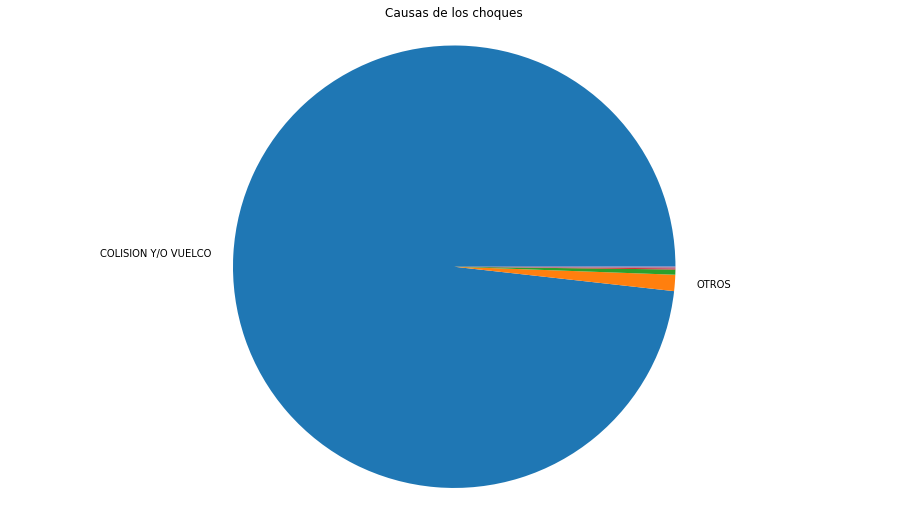

In [135]:
figure = plt.figure(figsize=(16,9))
labels = ["COLISION Y/O VUELCO","OTROS","","","","",""]
plt.pie(list(causas), labels=labels)
plt.title("Causas de los choques")
plt.axis('equal')

plt.show()